# Linear Programming in Python

### What is Linear Programming?

Linear Programming is the simplest mathematical optimization method. The goal is to achieve the best outcome, and by that we frequently mean either maximize the profit or minimize the cost. For a mathematical program to be linear, we need:
-	An **Objective Function** that is a linear expression
-	**Decision Variables** that are real variables
-	**Constrains** that are linear expressions

By linearity, we mean any expression of the following form,

$$
a_1x_1 + a_2x_2 + a_3x_3 + … a_n x_n =, >=, <= b
$$

where $x_i$ is the variable we want to calculate

In this notebook there going to be demonstrted two examples of linear programming. The first example is a simple example with 2 variables, that can be easily solved with graphical methods as well computing methods using the pulp library in Python, and the second one, is a more complex example, with no graphical reprsentation. Lets start with the examples.

## Maximization Problem Example

A company that produces amphoras and small sculptures uses pylon as raw material. The company wants to plan those two resources in order to maximize its revenue. The availability of man power is 40 hour per day and the availability of pylon is 120kg per day. The selling price for an amphora is $40 while for a sculpture is $50. Following we have the table that shows the demand in resources per produced item.

| Item        | Labor (hours/ item)| Pylon (kg/item) |
| ------------- |---------------| -------|
| Amphoras    | 1 | 4 |
| Sculptures      | 2      |  3 |

**Variables**:

$x_1$ : number of sculptures

$x_2$ : number of amphoras

**Objective Function**:

$max(z) = 40x_1 + 50x_2$

**Constrains**:

$x_1 + 2x_2 <= 40$

$4x_1 + 3x_2 <= 120$

$x_1, x_2 >= 0$

### 1. Graphical Solution

In [1]:
from pulp import *
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-whitegrid')
%matplotlib inline

First we will need to solve the linear equation to find the intersection of the two lines.

In [2]:
a = np.array([[2,1], [3,4]])
b = np.array([40,120])
x = np.linalg.solve(a, b)
print ('The coordinates are', (round(x[0]), round(x[1])))

('The coordinates are', (8.0, 24.0))


Lets plot our lines on to the Cartesian coordinate system.

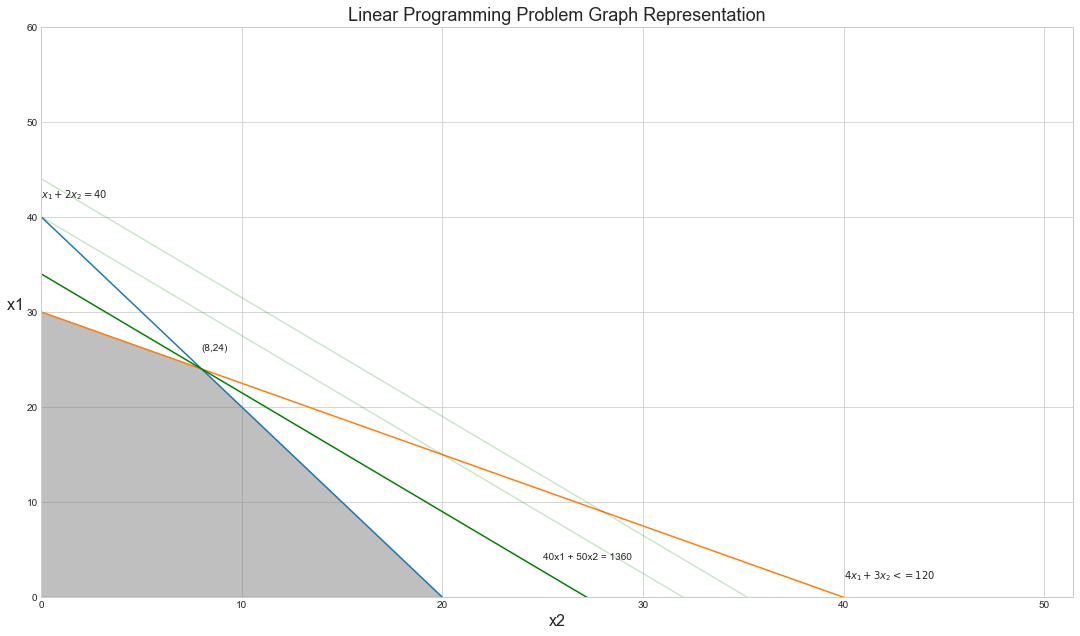

In [20]:
# Set a range for x-axis values
x = np.arange(0,50)

# The lines to plot
y1 = -2*x + 40
y2 = -(3.0/4)*x + 30
y3 = -(50.0/40)*x + 34
y4 = -(50.0/40)*x + 40
y5 = -(50.0/40)*x + 44

# Set y-limit, making neg y-values not show in plot
plt.ylim(0, 60)

# Plotting of lines
plt.plot(x, y1, 
         x, y2)
plt.plot(x, y3, 'g')
plt.plot(x, y4, 'g', alpha=0.2)
plt.plot(x, y5, 'g', alpha=0.2)

# Adding annotations
plt.text(0, 42, r'$x_1 + 2x_2 = 40$')
plt.text(40, 2, r'$4x_1 + 3x_2 <= 120$')
plt.text(8, 26, r'(8,24)')
plt.text(25, 4, r'40x1 + 50x2 = 1360')

# Creating the shaded area
x1 = [0,0,8,20]
x2 = [0,30,24,0]
plt.fill(x1, x2, color = 'grey', alpha=0.5)
plt.xlabel('x2', fontsize=16)
plt.ylabel('x1   ', fontsize=16, rotation=0)
plt.title('Linear Programming Problem Graph Representation', fontsize=18)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

The shaded area is the area of the possible solutions. In onder to figure out which variables maximize the objective function, and what is the the maximum profit that we can achieve, we are going to give different values for the profit and observe where it touchs with the shaded area. In the above plot, it is easily observed that the variables that maximize the objective function are,

$x_1$ = 24

$x_2$ = 8

and the revenue is $1360

### 2. Linear Programming Using pulp library

The way that pulp library works, is that you create the prob class, and then add all the problems parameters in it.

In [4]:
# Create the 'prob' variable that will host the problem's data
prob = LpProblem("Sculp Company",LpMaximize)

#### Creating the Variables

The way to create the variables x1 and x2 is by using the LpVariable class from the pulp library. 

In [5]:
# The 2 variables, number of Scuptures and number of Amphoras, 
# are created with a lower boundery of zero, no upper boundery and both are integers
x1=LpVariable("sculptures",0,None,LpInteger)
x2=LpVariable("amphoras",0,None,LpInteger)

#### Objective Function

In [6]:
# The objective function is added to 'prob'
prob += 40*x1 + 50*x2, "Total Revenue"

#### Constrains

In [7]:
# The two constraints are added to 'prob'
prob += x1 + 2*x2 <= 40, "Labor"
prob += 4*x1 + 3*x2 <= 120, "Pylon"

In [8]:
prob

Sculp Company:
MAXIMIZE
50*amphoras + 40*sculptures + 0
SUBJECT TO
Labor: 2 amphoras + sculptures <= 40

Pylon: 3 amphoras + 4 sculptures <= 120

VARIABLES
0 <= amphoras Integer
0 <= sculptures Integer

In [9]:
# The problem is solved using PuLP's choice of Solver
prob.solve()

1

In [10]:
# The status of the solution is printed 
print("Status of solution :", LpStatus[prob.status])

Status of solution : Optimal


In [11]:
# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, ":", v.varValue)

amphoras : 8.0
sculptures : 24.0


In [12]:
# The optimised objective function value is printed to the screen
print("Total Revenue : ", value(prob.objective))

Total Revenue :  1360.0


As we can observe both solutions, graphical and computational gave the exact same result. Total revenue $1360, number of amphoras 8 and number of sculptures 24. However, it is clear that the computational method was way faster. Let's take a look at another example, for which the graphical representation is impossible. 

## Minimization Problem Example

The health and diet department of a hospital is preparing 30 meals for patients every day of the month. One meal consists of pasta, chicken, potatoes, spinach, and apple pie. Also, every meal has to contain 63.000mg of protein, 10mg of iron, 15mg of niacin, 1mg of thiamine, and 50mg of Vitamin C. The table below provides information of the consistency of nutrients and fat in mg/100g of each meal ingredients. 

| Ingredient        | Protein| Iron | Niacin | Thiamine | Vitamin C | Fat |
| ------------- |---------------| -------|-------|-------|-------|-------|
| Pasta    | 5,000 | 1.1 | 1.4| 0.18 | 0 | 5,000|
| Chicken      | 29,000  |  1.8 | 5.4 | 0.06 | 0 | 5,000|
| Potatoes      | 5,300     |  0.5 | 0.9 | 0.06 | 10 | 7,900 |
| Spinach      | 3,000     |  2.2 | 0.5 | 0.07 | 28 | 300 |
| Apple Pie      | 4,000     |  1.2 | 0.6 | 0.15 | 3 | 14,300 |

In order to avoid giving out the same ingredients in each meal, there should be included at most 300g pasta, 300g chicken, 200g potatoes, 100g spinach, and 100g apple pie. What should be the mixture of ingredients in order to satisfy the nutritional requirements and provide the minimum fat? 

**Variables**:

$x_1$ : grams of pasta

$x_2$ : grams of chicken

$x_3$ : grams of potatoes

$x_4$ : grams of spinach

$x_5$ : grams of apple pie

**Objective Function**:

$min(z) = 5,000x_1 + 5,000x_2 + 7,900x_3 + 300x_4 + 14,300x_5$

**Constrains**:

$5,000x_1 + 29,000x_2 + 5,300x_3 + 3,000x_4 + 4,000x_5 >= 63,000$

$1.1x_1 + 1.8x_2 + 0.5x_3 + 2.2x_4 + 1.2x_5 >= 10$

$1.4x_1 + 5.4x_2 + 0.9x_3 + 0.5x_4 + 0.6x_5 >= 15$

$0.18x_1 + 0.06x_2 + 0.06x_3 + 0.07x_4 + 0.15x_5 >= 1$

$10x_3 + 28x_4 + 3x_5 >= 50$

$x_1, x_2 >= 300$

$x_3 >= 200$

$x_4, x_5 >= 100$

In [13]:
# Create the 'prob' variable that will host the problem's data
prob = LpProblem("Hospital",LpMinimize)
# The 2 variables, number of Scuptures and number of Amphoras, 
# are created with a lower boundery of zero, no upper boundery and both are integers
x1=LpVariable("pasta",300,None,LpInteger)
x2=LpVariable("chicken",300,None,LpInteger)
x3=LpVariable("potatoes",200,None,LpInteger)
x4=LpVariable("spinach",100,None,LpInteger)
x5=LpVariable("apple pie",100,None,LpInteger)
# The objective function is added to 'prob'
prob += 5000*x1 + 5000*x2 + 7900*x3 + 300*x4 + 14300*x5, "Total Fat"
# The two constraints are added to 'prob'
prob += 5000*x1 + 29000*x2 + 5300*x3 + 3000*x4 + 4000*x5 >= 63000, "protein"
prob += 1.1*x1 + 1.8*x2 + 0.5*x3 + 2.2*x4 + 1.2*x5 >= 10, "iron"
prob += 1.4*x1 + 5.4*x2 + 0.9*x3 + 0.5*x4 + 0.6*x5 >= 15, "niacin"
prob += 0.18*x1 + 0.06*x2 + 0.06*x3 + 0.07*x4 + 0.15*x5 >= 1, "thiamine"
prob += 10*x3 + 28*x4 + 3*x5 >= 50, "vitamin C"

In [14]:
prob.solve()

1

In [15]:
# The status of the solution is printed 
print("Status of solution :", LpStatus[prob.status])
# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print('The grams of', v.name, "included :", v.varValue, 'g')
# The optimised objective function value is printed to the screen
print("Fat included: ", value(prob.objective))

Status of solution : Optimal
The grams of apple_pie included : 100.0 g
The grams of chicken included : 300.0 g
The grams of pasta included : 300.0 g
The grams of potatoes included : 200.0 g
The grams of spinach included : 100.0 g
Fat included:  6040000.0


## References

http://www.kleerekoper.co.uk/2017/01/add-equation-to-seaborn-plot-and.html

https://pythonhosted.org/PuLP/CaseStudies/a_blending_problem.html

https://medium.com/italiandirectory-publishing/linear-programming-with-python-and-pulp-2413f09a8872

https://coral.ie.lehigh.edu/~ted/files/talks/PythonModeling.pdf